In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Ex 4.1

In [12]:
def conf_bound_ratio(T, sigma_sqr, delta):
    t = np.arange(1, T + 1)
    conf_bound_1 = np.sqrt(1 + 1 / (t * sigma_sqr)) * np.sqrt((2 * np.log(1 / delta) + np.log(t * sigma_sqr + 1)) / t)
    conf_bound_2 = np.sqrt((2 * np.log(2 / delta)) / t)
    return conf_bound_1 / conf_bound_2

The optimal t for sigma^2 = 1.0 is 8
The optimal t for sigma^2 = 0.1 is 82
The optimal t for sigma^2 = 0.01 is 821
The optimal t for sigma^2 = 0.001 is 8212
The optimal t for sigma^2 = 0.0001 is 82120
The optimal t for sigma^2 = 1e-05 is 821197
The optimal t for sigma^2 = 1e-06 is 8211968


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_18468\3795402273.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_1.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_18468\3795402273.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_2.show()


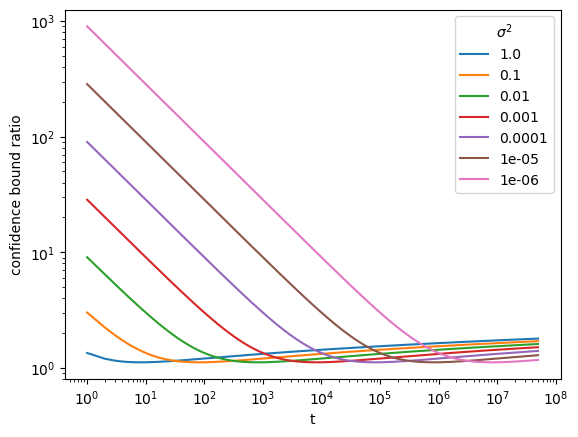

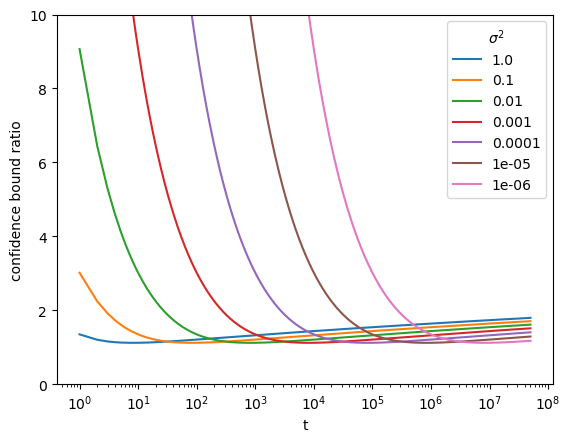

In [13]:
delta = 0.05
sigma_sqrs = 1 / (10 ** np.arange(7))
T = 5e7

fig_1, ax_1 = plt.subplots()
fig_2, ax_2 = plt.subplots()
for i in range(len(sigma_sqrs)):
    result = conf_bound_ratio(T, sigma_sqrs[i], delta)
    print(rf"The optimal t for sigma^2 = {sigma_sqrs[i]} is {np.argmin(result) + 1}")
    ax_1.loglog(np.arange(1, T + 1), result, label = sigma_sqrs[i])
    ax_2.semilogx(np.arange(1, T + 1), result, label = sigma_sqrs[i])

ax_1.set_xlabel("t")
ax_1.set_ylabel("confidence bound ratio")
ax_1.legend(title = r"$\sigma^2$")
fig_1.show()

ax_2.set_xlabel("t")
ax_2.set_ylim(0, 10)
ax_2.set_ylabel("confidence bound ratio")
ax_2.legend(title = r"$\sigma^2$")
fig_2.show()

## 4.2

In [35]:
def f_design_obj(A, X):
    A_inv = np.linalg.inv(A)
    return np.max(np.diag(X @ A_inv @ X.T))

def g_design_obj(A):
    return -np.log(np.linalg.det(A))

def greedy(N, n, d, X):
    I = np.zeros(N)
    I[:2 * d] = rng.integers(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmin(design_objs)
    
    return I

C:\Users\Wenhao\AppData\Local\Temp\ipykernel_17212\1052759244.py:6: RuntimeWarning: invalid value encountered in log
  return -np.log(np.linalg.det(A))
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_17212\3946703167.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_1.show()
C:\Users\Wenhao\AppData\Local\Temp\ipykernel_17212\3946703167.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_2.show()


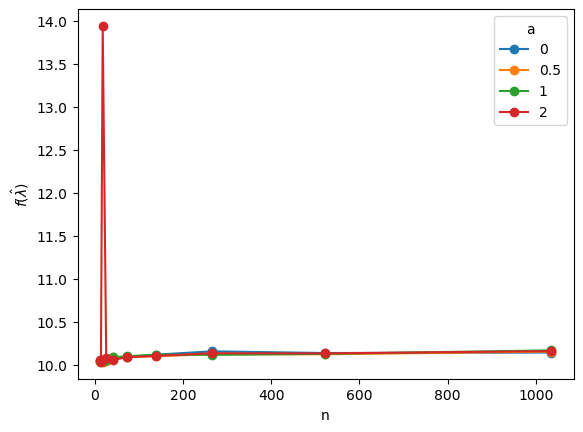

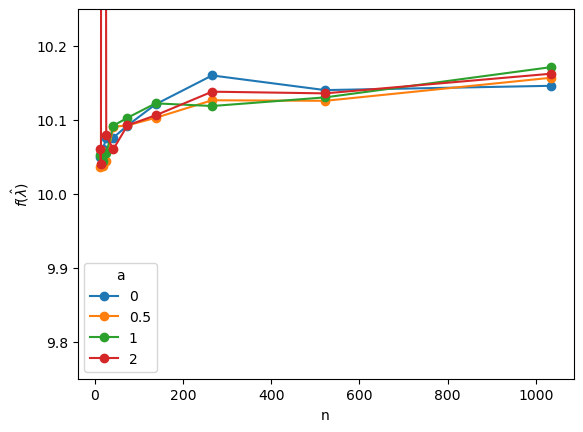

In [38]:
n_range = 10 + 2 ** np.arange(1, 11)
d = 10
N = 1000

rng = np.random.default_rng(541)

fig_1, ax_1 = plt.subplots()
fig_2, ax_2 = plt.subplots()

# a = 0
a = 0
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_1 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_1[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_1, "o-", label=a)
ax_2.plot(n_range, final_objs_1, "o-", label=a)

# a = 0.5
a = 0.5
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_2 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_2[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_2, "o-", label=a)
ax_2.plot(n_range, final_objs_2, "o-", label=a)

# a = 1
a = 1
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_3 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_3[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_3, "o-", label=a)
ax_2.plot(n_range, final_objs_3, "o-", label=a)

# a = 2
a = 2
cov_mat = np.diag(1 / (np.arange(1, d + 1) ** a))
final_objs_4 = np.zeros(len(n_range))
for i in range(len(n_range)):
    X = rng.multivariate_normal(np.zeros(d), cov_mat, size=n_range[i])
    I = greedy(N, n_range[i], d, X)
    final_objs_4[i] = f_design_obj(X[I.astype(int), :].T @ X[I.astype(int), :] / N, X)

ax_1.plot(n_range, final_objs_4, "o-", label=a)
ax_2.plot(n_range, final_objs_4, "o-", label=a)

ax_1.legend(title="a")
ax_1.set_xlabel("n")
ax_1.set_ylabel(r"$f(\hat{\lambda})$")
fig_1.show()

ax_2.legend(title="a")
ax_2.set_xlabel("n")
ax_2.set_ylabel(r"$f(\hat{\lambda})$")
ax_2.set_ylim(9.75, 10.25)
fig_2.show()

## 4.3

In [42]:
import numpy as np
np.random.seed(541)
n = 300
X = np.concatenate((np.linspace(0, 1, 50), 0.25 + 0.01 * np.random.randn(250)), 0)
X = np.sort(X)

K = np.zeros ((n ,n))
for i in range (n):
    for j in range ( n):
        K[i, j] = 1 + min(X[i], X[j])
        e, v = np.linalg.eigh(K) # eigenvalues are increasing in order
        d = 30
        Phi = np.real (v @ np.diag(np.sqrt(np.abs(e))))[:, (n - d)::]

def f(x):
    return -x ** 2 + x* np.cos(8 * x) + np.sin(15 * x)

f_star = f(X)

theta = np.linalg.lstsq(Phi, f_star, rcond = None)[0]
f_hat = Phi @ theta

In [43]:
def G_optimal(N, n, d, X):
    def g_design_obj(A):
        return -np.log(np.linalg.det(A))
    
    I = np.zeros(N)
    I[:2 * d] = np.random.randint(n, size = 2 * d)

    for t in np.arange(2 * d, N):
        design_objs = np.zeros(n)
        for k in np.arange(n):
            A = np.outer(X[k,:], X[k,:])
            X_I = X[I[:t].astype(int), :]
            A += X_I.T @ X_I
            design_objs[k] = g_design_obj(A)
        I[t] = np.argmin(design_objs)
    
    lbda = np.zeros(n)
    for i in I:
        lbda[int(i)] += 1
    lbda /= N

    return lbda

def observe(idx):
    return f(X[idx]) + np.random.randn(len(idx))

def sample_and_estimate(X, lbda, tau):
    n, d = X.shape
    reg = 1e-6 # we can add a bit of regularization to avoid divide by 0
    idx = np.random.choice(np.arange(n), size = tau , p = lbda)
    y = observe(idx)

    XtX = X[idx].T @ X[idx]
    XtY = X[idx].T @ y

    theta = np.linalg.lstsq (XtX + reg * np.eye(d), XtY, rcond = None)[0]
    return Phi @ theta, XtX

T = 1000

lbda_G = G_optimal(T, n, 30, Phi)
f_G_Phi, A = sample_and_estimate(Phi, lbda_G, T)
conf_G = np.sqrt(np.sum(Phi @ np.linalg.inv(A) * Phi, axis = 1))

lbda_unif = np.ones(n) / n
f_unif_Phi, A = sample_and_estimate(Phi, lbda_unif , T)
conf_unif = np.sqrt(np.sum(Phi @ np.linalg.inv(A) * Phi, axis = 1))


C:\Users\Wenhao\AppData\Local\Temp\ipykernel_17212\3208970116.py:3: RuntimeWarning: invalid value encountered in log
  return -np.log(np.linalg.det(A))


In [23]:
from scipy.stats import uniform

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

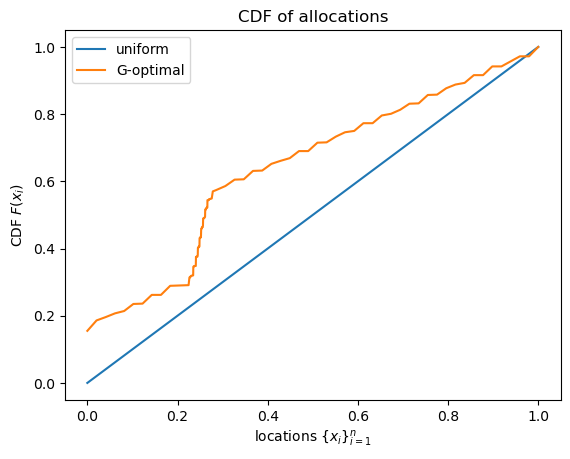

In [45]:
fig, ax = plt.subplots()
ax.plot(X, uniform.cdf(X), label = "uniform")
ax.plot(X, np.cumsum(lbda_G), label = "G-optimal")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"CDF $F(x_i)$")
ax.set_title("CDF of allocations")
plt.show()

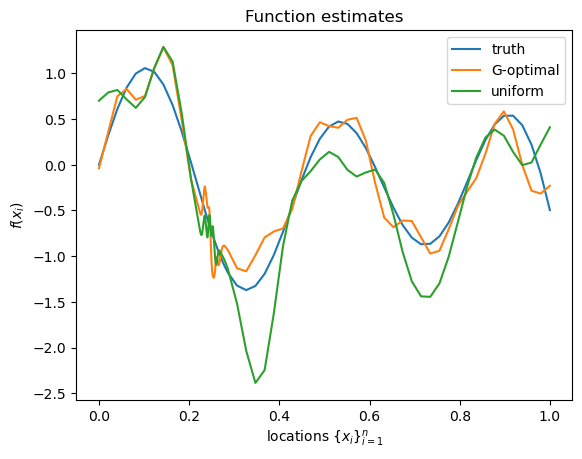

In [27]:
fig, ax = plt.subplots()
ax.plot(X, f_star, label = "truth")
ax.plot(X, f_G_Phi, label = "G-optimal")
ax.plot(X, f_unif_Phi, label = "uniform")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"$f(x_i)$")
ax.set_title("Function estimates")
plt.show()

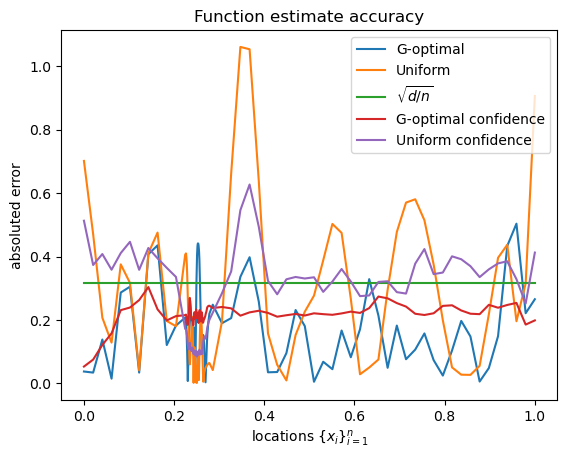

In [29]:
fig, ax = plt.subplots()
ax.plot(X, np.abs(f_G_Phi - f_star), label = "G-optimal")
ax.plot(X, np.abs(f_unif_Phi - f_star), label = "Uniform")
ax.plot(X, np.ones_like(X) * np.sqrt(d / n), label = r"$\sqrt{d/n}$")
ax.plot(X, conf_G, label = "G-optimal confidence")
ax.plot(X, conf_unif, label = "Uniform confidence")
ax.legend()
ax.set_xlabel(r"locations $\{x_i\}_{i=1}^n$")
ax.set_ylabel(r"absoluted error")
ax.set_title("Function estimate accuracy")
plt.show()